In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\Eros\Desktop\top_1000_artists_usa.csv'
artists_df = pd.read_csv(file_path)


In [36]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        1000 non-null   object
 1   popularity  1000 non-null   int64 
 2   followers   1000 non-null   int64 
 3   genres      1000 non-null   object
 4   date        1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [37]:
artists_df.rename(columns={'genres': 'music_genres'}, inplace=True)
display(artists_df)

,name,popularity,followers,music_genres,date
0,Taylor Swift,100,110018310,['pop'],2024-05-14
1,Drake,93,87652359,"['canadian hip hop', 'canadian pop', 'hip hop'...",2024-05-14
2,Bad Bunny,91,81055703,"['reggaeton', 'trap latino', 'urbano latino']",2024-05-14
3,The Weeknd,91,83230718,"['canadian contemporary r&b', 'canadian pop', ...",2024-05-14
4,Future,90,16967058,"['atl hip hop', 'hip hop', 'rap', 'southern hi...",2024-05-14
...,...,...,...,...,...
995,Focus Finders,45,127,['white noise'],2024-05-14
996,Isah Atkins,45,140,[],2024-05-14
997,Valérie Valérie,45,53,[],2024-05-14
998,Ursae Minoris,45,53,[],2024-05-14


In [38]:
from collections import Counter

all_genres = artists_df['music_genres'].apply(eval).sum()

genre_counts = Counter(all_genres)

genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['music_genres', 'Count']).sort_values(by='Count', ascending=False)

print(genre_counts_df.head(10))

genre_counts_df

             music_genres  Count
279           white noise     77
110           movie tunes     68
5                     rap     62
34   contemporary country     58
69                country     53
0                     pop     53
8           urbano latino     47
181          country road     47
217             gym phonk     44
7             trap latino     43


,music_genres,Count
279,white noise,77
110,movie tunes,68
5,rap,62
34,contemporary country,58
69,country,53
...,...,...
234,perreo,1
238,women's music,1
240,minneapolis sound,1
241,synth funk,1


In [39]:
top_100_artists = artists_df.nlargest(100, 'popularity')


all_genres = top_100_artists['music_genres'].str.strip('[]').str.replace("'", "").str.split(', ').explode()


print("Top 100 artistas más populares:")
print(top_100_artists[['name', 'popularity']])


Top 100 artistas más populares:
            name  popularity
0   Taylor Swift         100
1          Drake          93
2      Bad Bunny          91
3     The Weeknd          91
4         Future          90
..           ...         ...
95          Sech          78
96         SAIKO          78
97    FloyyMenor          78
98         Dei V          78
99   Jack Harlow          78

[100 rows x 2 columns]


In [40]:
genre_counts = all_genres.value_counts()
frequent_genres = genre_counts[genre_counts > 1]
print("\nGéneros que se repiten más de 15 veces:")
print(frequent_genres.head(15))


Géneros que se repiten más de 15 veces:
music_genres
pop                  24
rap                  24
trap latino          21
urbano latino        21
reggaeton            13
hip hop              11
trap                 10
sierreno              8
sad sierreno          8
corrido               7
r&b                   6
atl hip hop           6
corridos tumbados     6
rock                  5
pop rap               5
Name: count, dtype: int64


In [41]:
keywords = ['pop', 'rap', 'trap latino', 'urbano latino', 'reggaeton', 'hip hop','sierreno','corrido']
variant_counts = genre_counts[genre_counts.index.str.contains('|'.join(keywords), case=False)]

variant_counts

music_genres
pop                         24
rap                         24
trap latino                 21
urbano latino               21
reggaeton                   13
hip hop                     11
trap                        10
sierreno                     8
sad sierreno                 8
corrido                      7
atl hip hop                  6
corridos tumbados            6
pop rap                      5
dance pop                    4
melodic rap                  4
rage rap                     3
canadian pop                 3
reggaeton colombiano         3
atl trap                     2
latin hip hop                2
k-pop                        2
latin pop                    2
trap argentino               2
trap boricua                 2
pop dance                    2
kentucky hip hop             2
puerto rican pop             2
southern hip hop             2
conscious hip hop            2
chicago rap                  2
colombian pop                2
art pop                   

In [42]:
genres_dict = {
    'pop': ['pop', 'dance pop', 'pop rap', 'latin pop', 'pop dance', 'k-pop', 
            'puerto rican pop', 'art pop', 'swedish pop', 'australian pop', 'europop', 'pop r&b', 'k-pop boy group', 
            'singer-songwriter pop', 'uk pop', 'barbadian pop', 'hip pop', 'pop venezolano'],
    'rap': ['rap', 'melodic rap', 'rage rap', 'gangster rap', 'west coast rap', 'conscious hip hop', 'east coast hip hop', 
            'philly rap', 'kentucky hip hop', 'baton rouge rap', 'north carolina hip hop', 'queens hip hop', 'dfw rap', 
            'new orleans rap', 'spanish hip hop', 'chicago rap'],
    'trap latino': ['trap latino', 'trap argentino', 'trap boricua', 'trap triste', 'trap soul'],
    'urbano latino': ['urbano latino'],
    'reggaeton': ['reggaeton', 'reggaeton colombiano', 'reggaeton flow'],
    'hip hop': ['hip hop', 'atl hip hop', 'latin hip hop', 'southern hip hop', 'canadian hip hop', 'conscious hip hop'],
    'trap': ['trap', 'atl trap'],
    'sierreno': ['sierreno', 'sad sierreno'],
    'corrido' : ['corrido', 'corridos tumbados']
}

consolidated_counts = {genre: 0 for genre in genres_dict.keys()}

for genre, variants in genres_dict.items():
    for variant in variants:
        if variant in genre_counts:
            consolidated_counts[genre] += genre_counts[variant]

consolidated_counts_df = pd.DataFrame(list(consolidated_counts.items()), columns=['Genre', 'Frequency'])

consolidated_counts_df

,Genre,Frequency
0,pop,51
1,rap,47
2,trap latino,27
3,urbano latino,21
4,reggaeton,17
5,hip hop,24
6,trap,12
7,sierreno,16
8,corrido,13


In [43]:
top_10_artists = top_100_artists.head(10)

fig_artists = px.bar(top_10_artists, 
                     x='name', 
                     y='popularity', 
                     title='Top 10 Most Popular Artists in the USA',
                     labels={'name': 'artist', 'popularity': 'popularity'},
                     color='popularity')
colors = ['black', 'white', 'gray', 'limegreen', 'black', 'white', 'gray', 'limegreen', 'black', 'white']
fig_artists.update_traces(marker_color=colors)
fig_artists.update_traces(text=top_10_artists['popularity'], textposition='outside')

fig_artists.show()

In [44]:
top_10_artists = top_100_artists.head(10)

fig_artists = px.bar(top_10_artists, 
                     x='name', 
                     y='followers', 
                     title='Top 10 Most Followed Artists in the USA',
                     labels={'name': 'Artist', 'followers': 'Followers'},
                     color='popularity')

formatted_followers = top_10_artists['followers'].map('{:,}'.format)
fig_artists.update_traces(text=formatted_followers, textposition='outside')

fig_artists.update_traces(marker=dict(color=['black', 'white', 'gray', 'limegreen']*3))

fig_artists.show()

In [45]:
fig = px.bar(consolidated_counts_df, 
             x='Genre', 
             y='Frequency', 
             title= 'Frequency of Music Genres in the Top 100 Artist',
             labels={'Genre': 'Genres', 'Frequency': 'Frequency'})

colors = ['black', 'white', 'gray', 'limegreen', 'black', 'white', 'gray', 'limegreen']
fig.update_traces(marker_color=colors)

fig.update_traces(text=consolidated_counts_df['Frequency'], textposition='outside')

fig.show()

In [46]:
def show_top_10_artists_by_genre(genre):
    filtered_artists = top_10_artists_by_genre[top_10_artists_by_genre['music_genres'].apply(lambda x: genre in x)]
    filtered_artists = filtered_artists.drop_duplicates(subset=['name']).sort_values(by='popularity', ascending=False)
    return filtered_artists.head(10)


In [47]:
def consolidate_genres(genres):
    consolidated = []
    for genre in genres:
        for key, variants in genres_dict.items():
            if genre in variants:
                if key not in consolidated:
                    consolidated.append(key)
                break
    return consolidated

artists_df['music_genres'] = artists_df['music_genres'].apply(ast.literal_eval).apply(consolidate_genres)

top_10_artists_by_genre = pd.DataFrame()

for genre in genres_dict.keys():
    top_10_artists = artists_df[artists_df['music_genres'].apply(lambda x: genre in x)].sort_values(by='popularity', ascending=False).head(10)
    top_10_artists_by_genre = pd.concat([top_10_artists_by_genre, top_10_artists])

top_10_artists_by_genre.reset_index(drop=True, inplace=True)

top_10_artists_by_genre

,name,popularity,followers,music_genres,date
0,Taylor Swift,100,110018310,[pop],2024-05-14
1,Drake,93,87652359,"[hip hop, pop, rap]",2024-05-14
2,The Weeknd,91,83230718,[pop],2024-05-14
3,Ariana Grande,90,96245474,[pop],2024-05-14
4,Post Malone,88,43845207,"[rap, pop]",2024-05-14
...,...,...,...,...,...
85,Oscar Maydon,81,1526567,"[corrido, sierreno]",2024-05-14
86,Luis R Conriquez,81,4988862,"[corrido, sierreno]",2024-05-14
87,Gabito Ballesteros,80,2577075,"[corrido, sierreno]",2024-05-14
88,Grupo Marca Registrada,76,4140420,"[corrido, sierreno]",2024-05-14


In [48]:
pop_artists = show_top_10_artists_by_genre('pop')

pop_artists = pop_artists[~pop_artists['name'].isin(['Drake', 'Feid'])]

pop_artists

,name,popularity,followers,music_genres,date
0,Taylor Swift,100,110018310,[pop],2024-05-14
2,The Weeknd,91,83230718,[pop],2024-05-14
3,Ariana Grande,90,96245474,[pop],2024-05-14
4,Post Malone,88,43845207,"[rap, pop]",2024-05-14
5,SZA,88,19838645,"[pop, rap]",2024-05-14
9,Rihanna,87,59813781,[pop],2024-05-14
8,Dua Lipa,87,43311891,[pop],2024-05-14
7,Beyoncé,87,37341574,[pop],2024-05-14
6,Lana Del Rey,87,34944241,[pop],2024-05-14


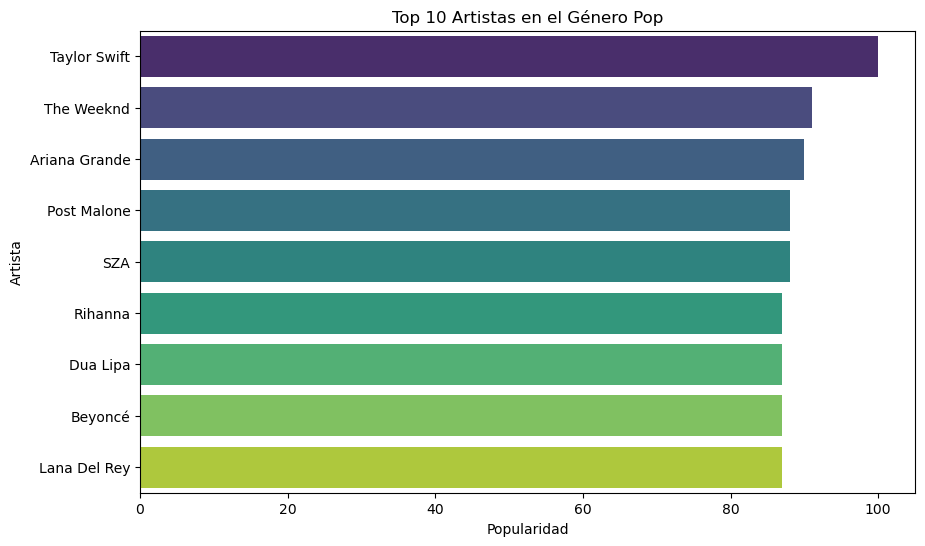

In [49]:
pop_artists = show_top_10_artists_by_genre('pop')

pop_artists = pop_artists[~pop_artists['name'].isin(['Drake', 'Feid'])]

def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()

visualize_top_10_artists_by_genre(pop_artists, 'pop')

In [50]:
rap_artists = show_top_10_artists_by_genre('rap')
display(rap_artists)

,name,popularity,followers,music_genres,date
1,Drake,93,87652359,"[hip hop, pop, rap]",2024-05-14
11,Kendrick Lamar,90,28758746,"[rap, hip hop]",2024-05-14
12,Metro Boomin,90,8052123,[rap],2024-05-14
13,Future,90,16967058,"[hip hop, rap, trap]",2024-05-14
14,Travis Scott,90,29262871,[rap],2024-05-14
15,Kanye West,89,25258883,"[rap, hip hop]",2024-05-14
4,Post Malone,88,43845207,"[rap, pop]",2024-05-14
5,SZA,88,19838645,"[pop, rap]",2024-05-14
18,21 Savage,87,18427480,"[hip hop, rap]",2024-05-14
19,Playboi Carti,85,10667554,"[hip hop, rap]",2024-05-14


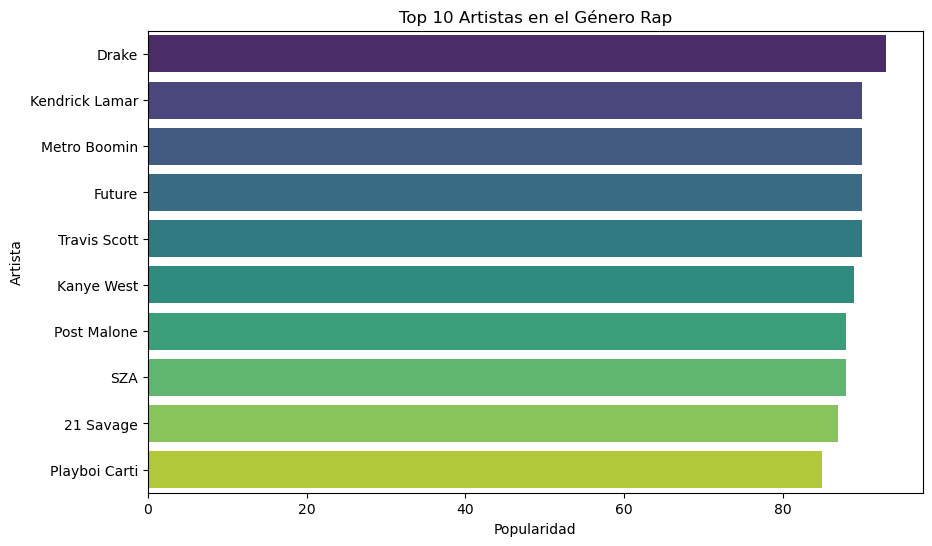

In [51]:

pop_artists = show_top_10_artists_by_genre('rap')

# Definir la función de visualización
def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()


visualize_top_10_artists_by_genre(pop_artists, 'rap')

In [52]:
trap_latino_artists = show_top_10_artists_by_genre('trap latino')
display(trap_latino_artists)

,name,popularity,followers,music_genres,date
20,Bad Bunny,91,81055703,"[reggaeton, trap latino, urbano latino]",2024-05-14
21,Feid,88,11118133,"[reggaeton, trap latino, urbano latino]",2024-05-14
22,KAROL G,86,46163586,"[reggaeton, trap latino, urbano latino]",2024-05-14
23,Rauw Alejandro,86,21597242,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
24,Myke Towers,85,14707990,"[reggaeton, trap latino, urbano latino]",2024-05-14
25,Anuel AA,84,35404295,"[reggaeton, trap latino, urbano latino]",2024-05-14
26,Ozuna,83,36517553,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
27,Daddy Yankee,83,33617992,"[hip hop, reggaeton, trap latino, urbano latino]",2024-05-14
28,Bizarrap,82,15144110,"[pop, trap latino, urbano latino]",2024-05-14
29,Cris Mj,82,2412132,"[trap latino, urbano latino]",2024-05-14


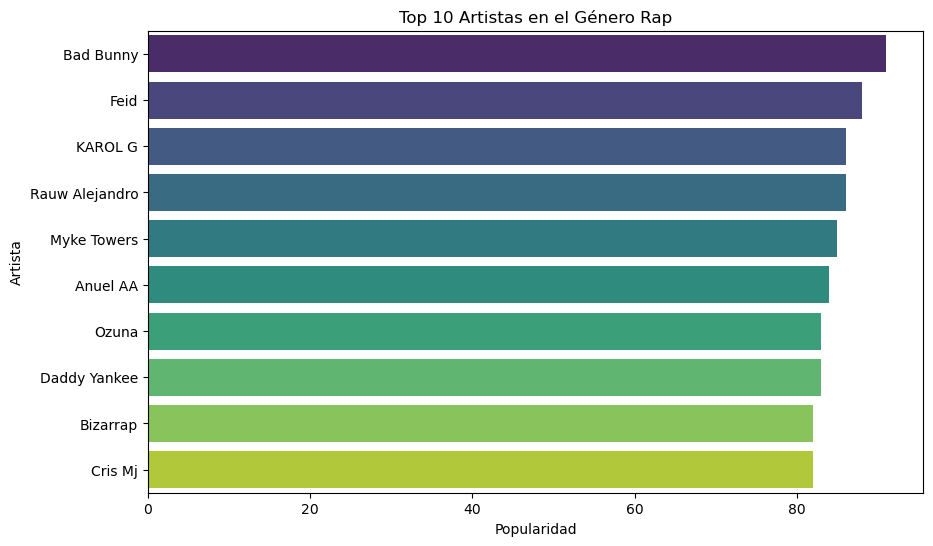

In [53]:
pop_artists = show_top_10_artists_by_genre('trap latino')

def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()

visualize_top_10_artists_by_genre(pop_artists, 'rap')

In [54]:
hip_hop_artists = show_top_10_artists_by_genre('hip hop')
display(hip_hop_artists)

,name,popularity,followers,music_genres,date
1,Drake,93,87652359,"[hip hop, pop, rap]",2024-05-14
11,Kendrick Lamar,90,28758746,"[rap, hip hop]",2024-05-14
13,Future,90,16967058,"[hip hop, rap, trap]",2024-05-14
15,Kanye West,89,25258883,"[rap, hip hop]",2024-05-14
18,21 Savage,87,18427480,"[hip hop, rap]",2024-05-14
19,Playboi Carti,85,10667554,"[hip hop, rap]",2024-05-14
56,J. Cole,84,23462332,"[rap, hip hop]",2024-05-14
27,Daddy Yankee,83,33617992,"[hip hop, reggaeton, trap latino, urbano latino]",2024-05-14
58,Gunna,82,7147132,"[hip hop, rap, trap]",2024-05-14
59,Lil Wayne,82,14491618,"[hip hop, rap, pop, trap]",2024-05-14


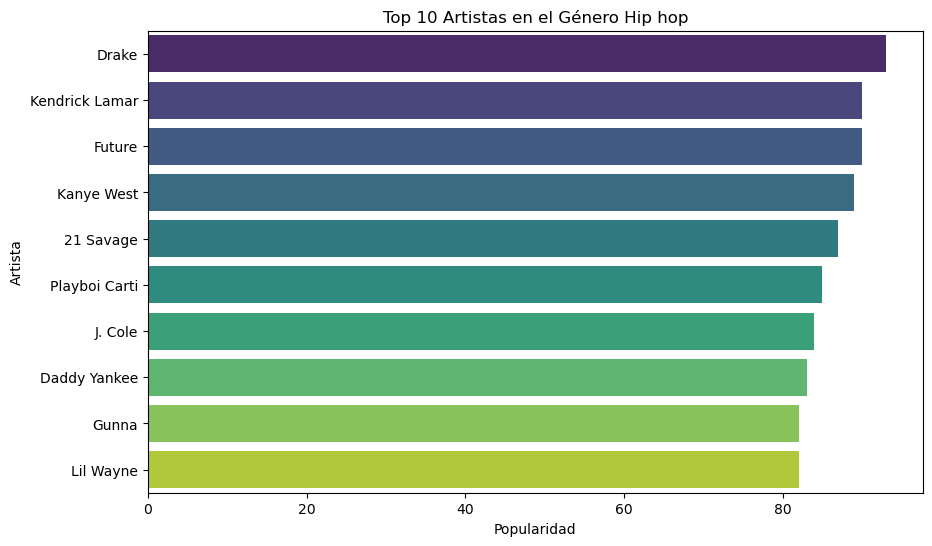

In [55]:
pop_artists = show_top_10_artists_by_genre('hip hop')

def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()


visualize_top_10_artists_by_genre(pop_artists, 'hip hop')

In [56]:
urbano_latino_artists = show_top_10_artists_by_genre('urbano latino')
display(urbano_latino_artists)

,name,popularity,followers,music_genres,date
20,Bad Bunny,91,81055703,"[reggaeton, trap latino, urbano latino]",2024-05-14
21,Feid,88,11118133,"[reggaeton, trap latino, urbano latino]",2024-05-14
22,KAROL G,86,46163586,"[reggaeton, trap latino, urbano latino]",2024-05-14
23,Rauw Alejandro,86,21597242,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
24,Myke Towers,85,14707990,"[reggaeton, trap latino, urbano latino]",2024-05-14
25,Anuel AA,84,35404295,"[reggaeton, trap latino, urbano latino]",2024-05-14
26,Ozuna,83,36517553,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
27,Daddy Yankee,83,33617992,"[hip hop, reggaeton, trap latino, urbano latino]",2024-05-14
28,Bizarrap,82,15144110,"[pop, trap latino, urbano latino]",2024-05-14
29,Cris Mj,82,2412132,"[trap latino, urbano latino]",2024-05-14


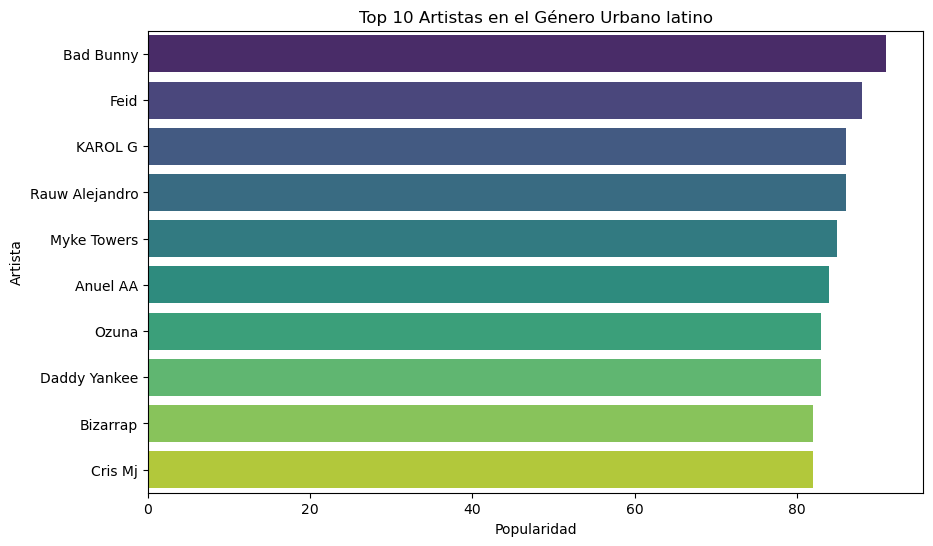

In [57]:
pop_artists = show_top_10_artists_by_genre('urbano latino')

def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()

#
visualize_top_10_artists_by_genre(pop_artists, 'urbano latino')

In [58]:
reggaeton_artists = show_top_10_artists_by_genre('reggaeton')
display(reggaeton_artists)

,name,popularity,followers,music_genres,date
20,Bad Bunny,91,81055703,"[reggaeton, trap latino, urbano latino]",2024-05-14
21,Feid,88,11118133,"[reggaeton, trap latino, urbano latino]",2024-05-14
22,KAROL G,86,46163586,"[reggaeton, trap latino, urbano latino]",2024-05-14
23,Rauw Alejandro,86,21597242,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
24,Myke Towers,85,14707990,"[reggaeton, trap latino, urbano latino]",2024-05-14
25,Anuel AA,84,35404295,"[reggaeton, trap latino, urbano latino]",2024-05-14
26,Ozuna,83,36517553,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
27,Daddy Yankee,83,33617992,"[hip hop, reggaeton, trap latino, urbano latino]",2024-05-14
48,Maluma,81,33646145,"[pop, reggaeton, trap latino, urbano latino]",2024-05-14
49,Arcángel,80,13973643,"[hip hop, reggaeton, trap latino, urbano latino]",2024-05-14


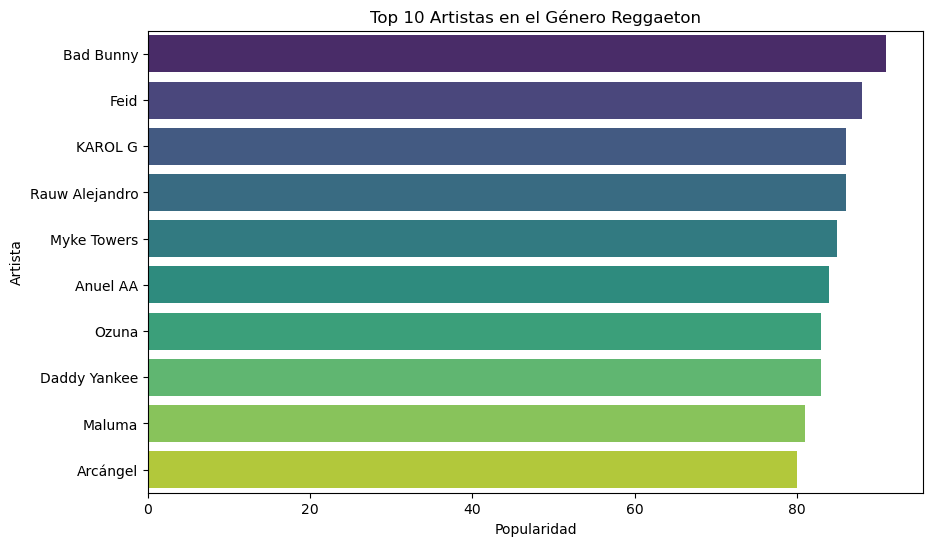

In [27]:
pop_artists = show_top_10_artists_by_genre('reggaeton')

def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()


visualize_top_10_artists_by_genre(pop_artists, 'reggaeton')

In [59]:
sierreno_artists = show_top_10_artists_by_genre('sierreno')
display(sierreno_artists)

,name,popularity,followers,music_genres,date
70,Peso Pluma,87,13422707,"[corrido, sierreno]",2024-05-14
71,Junior H,86,15832722,"[corrido, sierreno]",2024-05-14
72,Natanael Cano,86,12519487,"[corrido, sierreno]",2024-05-14
73,Fuerza Regida,85,8783683,"[corrido, sierreno]",2024-05-14
74,Carin Leon,82,11340068,"[corrido, sierreno]",2024-05-14
75,Oscar Maydon,81,1526567,"[corrido, sierreno]",2024-05-14
76,Luis R Conriquez,81,4988862,"[corrido, sierreno]",2024-05-14
77,Xavi,80,4324585,[sierreno],2024-05-14
78,Gabito Ballesteros,80,2577075,"[corrido, sierreno]",2024-05-14
79,Julión Álvarez y su Norteño Banda,79,5054155,[sierreno],2024-05-14


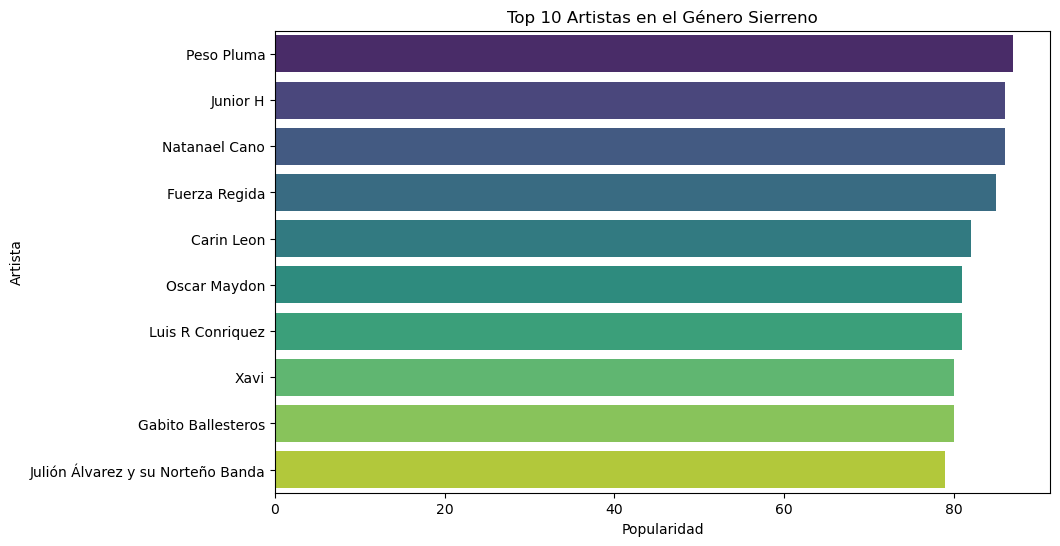

In [60]:

pop_artists = show_top_10_artists_by_genre('sierreno')


def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()


visualize_top_10_artists_by_genre(pop_artists, 'sierreno')

In [61]:
corrido_artists = show_top_10_artists_by_genre('corrido')
display(corrido_artists)

,name,popularity,followers,music_genres,date
70,Peso Pluma,87,13422707,"[corrido, sierreno]",2024-05-14
71,Junior H,86,15832722,"[corrido, sierreno]",2024-05-14
72,Natanael Cano,86,12519487,"[corrido, sierreno]",2024-05-14
73,Fuerza Regida,85,8783683,"[corrido, sierreno]",2024-05-14
74,Carin Leon,82,11340068,"[corrido, sierreno]",2024-05-14
75,Oscar Maydon,81,1526567,"[corrido, sierreno]",2024-05-14
76,Luis R Conriquez,81,4988862,"[corrido, sierreno]",2024-05-14
78,Gabito Ballesteros,80,2577075,"[corrido, sierreno]",2024-05-14
88,Grupo Marca Registrada,76,4140420,"[corrido, sierreno]",2024-05-14
89,Chino Pacas,76,1959122,"[corrido, sierreno]",2024-05-14


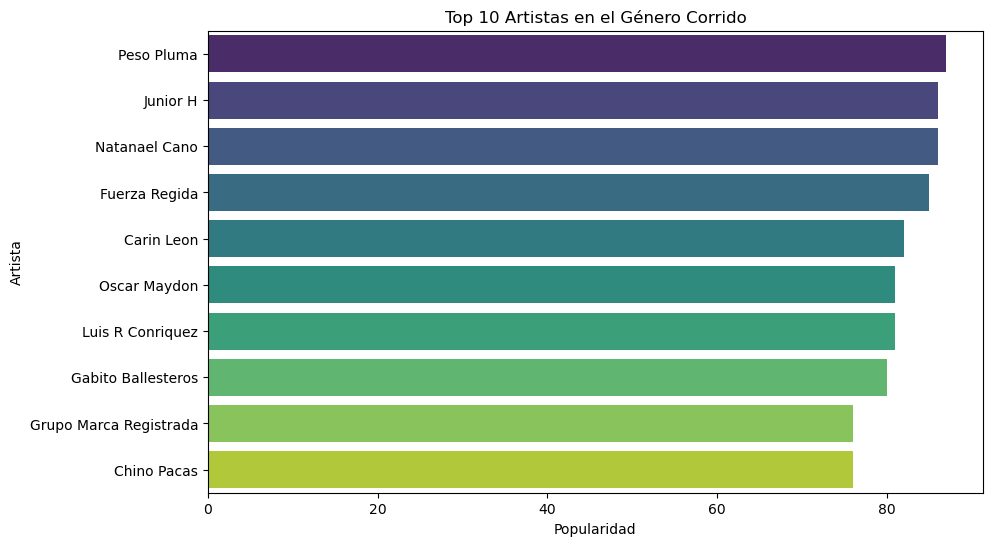

In [31]:

pop_artists = show_top_10_artists_by_genre('corrido')


def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()


visualize_top_10_artists_by_genre(pop_artists, 'corrido')

In [62]:
trap_artists = show_top_10_artists_by_genre('trap')
display(trap_artists)

,name,popularity,followers,music_genres,date
13,Future,90,16967058,"[hip hop, rap, trap]",2024-05-14
58,Gunna,82,7147132,"[hip hop, rap, trap]",2024-05-14
59,Lil Wayne,82,14491618,"[hip hop, rap, pop, trap]",2024-05-14
61,Ty Dolla $ign,82,5229951,"[hip hop, pop, trap, trap latino]",2024-05-14
62,Lil Baby,82,17356772,"[hip hop, trap, rap]",2024-05-14
65,Lil Uzi Vert,81,17067747,"[hip hop, rap, trap]",2024-05-14
66,A$AP Rocky,81,14010476,"[rap, hip hop, trap]",2024-05-14
67,Young Thug,80,9862494,"[hip hop, trap, rap]",2024-05-14
68,Don Toliver,80,4242540,"[pop, rap, trap]",2024-05-14
69,Lil Durk,78,7438277,"[rap, hip hop, trap]",2024-05-14


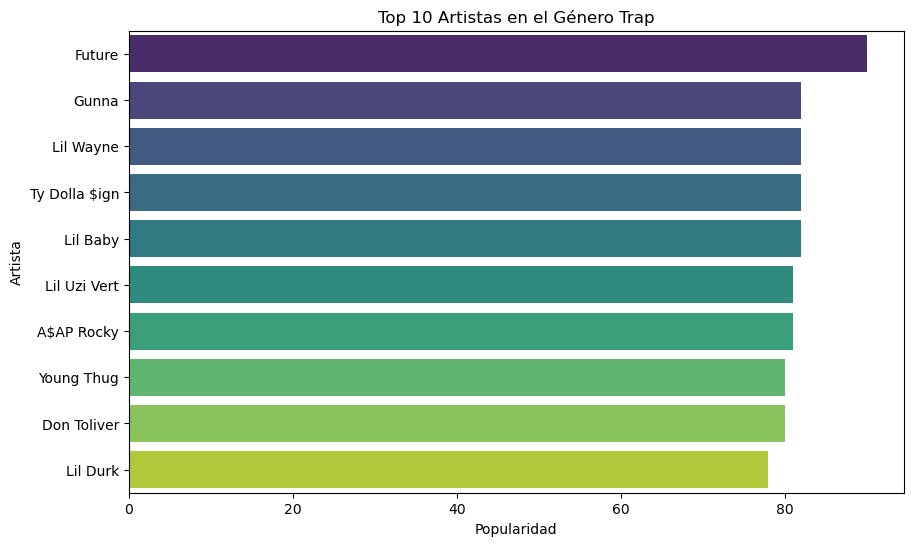

In [63]:

pop_artists = show_top_10_artists_by_genre('trap')

# Definir la función de visualización
def visualize_top_10_artists_by_genre(artists, genre):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='name', data=artists, palette='viridis')
    plt.title(f'Top 10 Artistas en el Género {genre.capitalize()}')
    plt.xlabel('Popularidad')
    plt.ylabel('Artista')
    plt.show()

# Visualizar los resultados
visualize_top_10_artists_by_genre(pop_artists, 'trap')